## Data Loading 

In [1]:

import sys
import os

# Adjust the path to where your src folder is located relative to your notebook
sys.path.append(os.path.abspath("../src"))

# Now you can import your modules from src
from data_loader import load_stock_data


df_tsla = load_stock_data("TSLA", "2015-07-01", "2025-07-31")
df_bnd = load_stock_data("BND", "2015-07-01", "2025-07-31")
df_spy = load_stock_data("SPY", "2015-07-01", "2025-07-31")

c:\Users\segni\Documents\GitHub\financial-daily-returns-trend-prediction\src\data_loader.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
c:\Users\segni\Documents\GitHub\financial-daily-returns-trend-prediction\src\data_loader.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)


Data saved to data/raw\TSLA_historical.csv


[*********************100%***********************]  1 of 1 completed
c:\Users\segni\Documents\GitHub\financial-daily-returns-trend-prediction\src\data_loader.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)


Data saved to data/raw\BND_historical.csv


[*********************100%***********************]  1 of 1 completed

Data saved to data/raw\SPY_historical.csv


In [2]:
from IPython.display import display, Markdown as markdown

display(markdown("### Tesla (TSLA)"))
display(df_tsla.head())

display(markdown("### Vanguard Total Bond Market ETF (BND)"))

display(df_bnd.head()) 

display(markdown("### S&P 500 ETF (SPY)"))
display(df_spy.head())

### Tesla (TSLA)

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500


### Vanguard Total Bond Market ETF (BND)

Price,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND
Date,,,,,
2015-07-01,60.816769,60.914494,60.764146,60.794217,5399300
2015-07-02,60.967052,61.027194,60.936982,60.936982,1060100
2015-07-06,61.177597,61.222706,61.057320,61.222706,2210700
2015-07-07,61.237728,61.470769,61.237728,61.410634,4183200
2015-07-08,61.410618,61.463240,61.312886,61.373028,1967800


### S&P 500 ETF (SPY)

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2015-07-01,174.917145,175.363920,174.124747,175.111025,135979900
2015-07-02,174.756943,175.566203,174.335456,175.397611,104373700
2015-07-06,174.259583,175.043542,173.256441,173.458760,117975400
2015-07-07,175.355484,175.481925,172.059452,174.461933,173820200
2015-07-08,172.413452,174.293280,172.177420,174.006672,164020100


### Fill missed value date with interpolate

In [3]:
# fill missed value date with interpolate
df_tsla = df_tsla.asfreq('D').interpolate(method='linear')
df_bnd = df_bnd.asfreq('D').interpolate(method='linear')
df_spy = df_spy.asfreq('D').interpolate(method='linear')

In [4]:
# clean column
columns = [col[0] for col in df_tsla.columns]

df_tsla.columns = columns
df_bnd.columns = columns   
df_spy.columns = columns

In [5]:
# make index to column
df_tsla.reset_index(inplace=True)
df_bnd.reset_index(inplace=True)
df_spy.reset_index(inplace=True)

### Save data

* save raw data fetched or yahoo finance

In [6]:
from data_loader import save_to_csv


save_to_csv(df_tsla, "tsla_data.csv")
save_to_csv(df_bnd, "bnd_data.csv")
save_to_csv(df_spy, "spy_data.csv")

Data saved to ../data/raw\tsla_data.csv
Data saved to ../data/raw\bnd_data.csv
Data saved to ../data/raw\spy_data.csv


### check missed data

In [7]:
# check missed data
from data_loader import check_missing_data

missed_tsla = check_missing_data(df_tsla)
missed_bnd = check_missing_data(df_bnd)
missed_spy = check_missing_data(df_spy)


display(markdown("### Missing data in TSLA"))
display(missed_tsla)
display(markdown("### Missing data in BND"))
display(missed_bnd)
display(markdown("### Missing data in SPY"))
display(missed_spy)

No missing data found.
No missing data found.
No missing data found.


### Missing data in TSLA

Series([], dtype: int64)

### Missing data in BND

Series([], dtype: int64)

### Missing data in SPY

Series([], dtype: int64)

### Data Information

In [8]:
display(markdown("### Data Information"))
display(markdown("#### Tesla (TSLA)"))
display(df_tsla.info())

display(markdown("#### Vanguard Total Bond Market ETF (BND)"))
display(df_bnd.info())

display(markdown("#### S&P 500 ETF (SPY)"))
display(df_spy.info())

### Data Information

#### Tesla (TSLA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3683 non-null   datetime64[ns]
 1   Close   3683 non-null   float64       
 2   High    3683 non-null   float64       
 3   Low     3683 non-null   float64       
 4   Open    3683 non-null   float64       
 5   Volume  3683 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 172.8 KB


None

#### Vanguard Total Bond Market ETF (BND)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3683 non-null   datetime64[ns]
 1   Close   3683 non-null   float64       
 2   High    3683 non-null   float64       
 3   Low     3683 non-null   float64       
 4   Open    3683 non-null   float64       
 5   Volume  3683 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 172.8 KB


None

#### S&P 500 ETF (SPY)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3683 non-null   datetime64[ns]
 1   Close   3683 non-null   float64       
 2   High    3683 non-null   float64       
 3   Low     3683 non-null   float64       
 4   Open    3683 non-null   float64       
 5   Volume  3683 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 172.8 KB


None

### Basic statistic Analysis

In [9]:
display(markdown("### Data Statistics"))
display(markdown("#### Tesla (TSLA)"))
display(df_tsla.describe())
display(markdown("#### Vanguard Total Bond Market ETF (BND)"))
display(df_bnd.describe())
display(markdown("#### S&P 500 ETF (SPY)"))
display(df_spy.describe())

### Data Statistics

#### Tesla (TSLA)

,Date,Close,High,Low,Open,Volume
count,3683,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03
mean,2020-07-15 00:00:00.000000256,132.291913,135.238658,129.109524,132.226214,1.140628e+08
min,2015-07-01 00:00:00,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,2018-01-06 12:00:00,19.028000,19.294111,18.603111,18.912445,7.005225e+07
50%,2020-07-15 00:00:00,96.088669,99.509776,93.037557,95.666664,9.537300e+07
75%,2023-01-21 12:00:00,236.991661,240.983335,232.451660,236.649996,1.316288e+08
max,2025-07-30 00:00:00,479.859985,488.540009,457.510010,475.899994,9.140820e+08
std,NaN,121.253796,124.036842,118.264852,121.206459,7.148631e+07


#### Vanguard Total Bond Market ETF (BND)

,Date,Close,High,Low,Open,Volume
count,3683,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03
mean,2020-07-15 00:00:00.000000256,68.467517,68.568458,68.365201,68.470188,4.421263e+06
min,2015-07-01 00:00:00,60.779133,60.899416,60.764146,60.786652,0.000000e+00
25%,2018-01-06 12:00:00,64.666353,64.734868,64.586509,64.664561,2.189817e+06
50%,2020-07-15 00:00:00,67.599327,67.730549,67.483214,67.593830,4.109233e+06
75%,2023-01-21 12:00:00,71.874538,71.998555,71.770929,71.858814,5.884617e+06
max,2025-07-30 00:00:00,77.318298,77.413307,77.283734,77.378749,3.396300e+07
std,NaN,4.549564,4.558177,4.538681,4.549809,2.834752e+06


#### S&P 500 ETF (SPY)

,Date,Close,High,Low,Open,Volume
count,3683,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03
mean,2020-07-15 00:00:00.000000256,334.491893,336.245481,332.413442,334.404326,8.525991e+07
min,2015-07-01 00:00:00,155.869751,156.926731,153.758441,155.426500,2.027000e+07
25%,2018-01-06 12:00:00,231.310412,234.170278,228.966563,231.639718,5.837948e+07
50%,2020-07-15 00:00:00,305.437744,306.853176,303.168921,305.267971,7.481450e+07
75%,2023-01-21 12:00:00,420.802114,423.252999,418.181662,420.497636,9.786790e+07
max,2025-07-30 00:00:00,637.099976,638.669983,635.539978,638.349976,5.072443e+08
std,NaN,126.625409,127.229343,125.854252,126.561484,4.399891e+07


### Calculate Daily return 

In [10]:
df_bnd["daily_return"] = df_bnd["Close"].pct_change()
df_tsla["daily_return"] = df_tsla["Close"].pct_change()
df_spy["daily_return"] = df_spy["Close"].pct_change()

In [11]:
display(markdown("### Data Statistics"))
display(markdown("#### Tesla (TSLA)"))
display(df_tsla.describe())
display(markdown("#### Vanguard Total Bond Market ETF (BND)"))
display(df_bnd.describe())
display(markdown("#### S&P 500 ETF (SPY)"))
display(df_spy.describe())
# --- EOF ---


### Data Statistics

#### Tesla (TSLA)

,Date,Close,High,Low,Open,Volume,daily_return
count,3683,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03,3682.000000
mean,2020-07-15 00:00:00.000000256,132.291913,135.238658,129.109524,132.226214,1.140628e+08,0.001162
min,2015-07-01 00:00:00,9.578000,10.331333,9.403333,9.488000,1.062000e+07,-0.171758
25%,2018-01-06 12:00:00,19.028000,19.294111,18.603111,18.912445,7.005225e+07,-0.009868
50%,2020-07-15 00:00:00,96.088669,99.509776,93.037557,95.666664,9.537300e+07,0.000860
75%,2023-01-21 12:00:00,236.991661,240.983335,232.451660,236.649996,1.316288e+08,0.012289
max,2025-07-30 00:00:00,479.859985,488.540009,457.510010,475.899994,9.140820e+08,0.226900
std,NaN,121.253796,124.036842,118.264852,121.206459,7.148631e+07,0.027626


#### Vanguard Total Bond Market ETF (BND)

,Date,Close,High,Low,Open,Volume,daily_return
count,3683,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03,3682.000000
mean,2020-07-15 00:00:00.000000256,68.467517,68.568458,68.365201,68.470188,4.421263e+06,0.000053
min,2015-07-01 00:00:00,60.779133,60.899416,60.764146,60.786652,0.000000e+00,-0.054385
25%,2018-01-06 12:00:00,64.666353,64.734868,64.586509,64.664561,2.189817e+06,-0.000929
50%,2020-07-15 00:00:00,67.599327,67.730549,67.483214,67.593830,4.109233e+06,0.000000
75%,2023-01-21 12:00:00,71.874538,71.998555,71.770929,71.858814,5.884617e+06,0.000963
max,2025-07-30 00:00:00,77.318298,77.413307,77.283734,77.378749,3.396300e+07,0.042201
std,NaN,4.549564,4.558177,4.538681,4.549809,2.834752e+06,0.002682


#### S&P 500 ETF (SPY)

,Date,Close,High,Low,Open,Volume,daily_return
count,3683,3683.000000,3683.000000,3683.000000,3683.000000,3.683000e+03,3682.000000
mean,2020-07-15 00:00:00.000000256,334.491893,336.245481,332.413442,334.404326,8.525991e+07,0.000388
min,2015-07-01 00:00:00,155.869751,156.926731,153.758441,155.426500,2.027000e+07,-0.095677
25%,2018-01-06 12:00:00,231.310412,234.170278,228.966563,231.639718,5.837948e+07,-0.001955
50%,2020-07-15 00:00:00,305.437744,306.853176,303.168921,305.267971,7.481450e+07,0.000333
75%,2023-01-21 12:00:00,420.802114,423.252999,418.181662,420.497636,9.786790e+07,0.003295
max,2025-07-30 00:00:00,637.099976,638.669983,635.539978,638.349976,5.072443e+08,0.105019
std,NaN,126.625409,127.229343,125.854252,126.561484,4.399891e+07,0.008765


In [12]:
# fillna daily return with with ffill_forward
df_bnd["daily_return"].fillna(method='ffill', inplace=True)
df_tsla["daily_return"].fillna(method='ffill', inplace=True)
df_spy["daily_return"].fillna(method='ffill', inplace=True)

C:\Users\segni\AppData\Local\Temp\ipykernel_37436\1676578584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bnd["daily_return"].fillna(method='ffill', inplace=True)
C:\Users\segni\AppData\Local\Temp\ipykernel_37436\1676578584.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bnd["daily_return"].fillna(method='ffill', inplace=True)
C:\Users\segni\AppData\Local\Temp\ipykernel_37436\1676578584.py:3: FutureWarning: A value is tryi

In [13]:
# save daily return data
save_to_csv(df_tsla, "tsla_data_with_daily_return.csv")
save_to_csv(df_bnd, "bnd_data_with_daily_return.csv")
save_to_csv(df_spy, "spy_data_with_daily_return.csv")

Data saved to ../data/raw\tsla_data_with_daily_return.csv
Data saved to ../data/raw\bnd_data_with_daily_return.csv
Data saved to ../data/raw\spy_data_with_daily_return.csv


### Check skewness of data daily return

In [14]:
skewness_tsla = df_tsla["daily_return"].skew()
skewness_bnd = df_bnd["daily_return"].skew()
skewness_spy = df_spy["daily_return"].skew()

display(markdown("### Skewness of Daily Returns"))
display(markdown(f"* Tesla (TSLA): {skewness_tsla:.4f}"))
display(markdown(f"* Vanguard Total Bond Market ETF (BND): {skewness_bnd:.4f}"))
display(markdown(f"* S&P 500 ETF (SPY): {skewness_spy:.4f}"))

### Skewness of Daily Returns

* Tesla (TSLA): 0.3584

* Vanguard Total Bond Market ETF (BND): -1.3097

* S&P 500 ETF (SPY): 0.1643

In [15]:
# kurtosis
kurtosis_tsla = df_tsla["daily_return"].kurtosis()
kurtosis_bnd = df_bnd["daily_return"].kurtosis()
kurtosis_spy = df_spy["daily_return"].kurtosis()

display(markdown("### Kurtosis of Daily Returns"))
display(markdown(f"* Tesla (TSLA): {kurtosis_tsla:.4f}"))
display(markdown(f"* Vanguard Total Bond Market ETF (BND): {kurtosis_bnd:.4f}"))
display(markdown(f"* S&P 500 ETF (SPY): {kurtosis_spy:.4f}"))

### Kurtosis of Daily Returns

* Tesla (TSLA): 8.1030

* Vanguard Total Bond Market ETF (BND): 69.0766

* S&P 500 ETF (SPY): 20.6773

#### Rolling Standard Deviation and variance seven days

In [16]:
# Rolling Standard Deviation and variance seven days
# standard deviation
df_tsla["rolling_std_7d"] = df_tsla["daily_return"].rolling(window=7).std()
df_bnd["rolling_std_7d"] = df_bnd["daily_return"].rolling(window=7).std()
df_spy["rolling_std_7d"] = df_spy["daily_return"].rolling(window=7).std()


#variance
df_tsla["rolling_var_7d"] = df_tsla["daily_return"].rolling(window=7).var()
df_bnd["rolling_var_7d"] = df_bnd["daily_return"].rolling(window=7).var()
df_spy["rolling_var_7d"] = df_spy["daily_return"].rolling(window=7).var()


# mean
df_tsla["rolling_mean_7d"] = df_tsla["daily_return"].rolling(window=7).mean()
df_bnd["rolling_mean_7d"] = df_bnd["daily_return"].rolling(window=7).mean()
df_spy["rolling_mean_7d"] = df_spy["daily_return"].rolling(window=7).mean()



In [17]:
# check missing data
missed_tsla = check_missing_data(df_tsla)
missed_bnd = check_missing_data(df_bnd)
missed_spy = check_missing_data(df_spy)

display(markdown("### Missing data in TSLA"))
display(missed_tsla)
display(markdown("### Missing data in BND"))
display(missed_bnd)
display(markdown("### Missing data in SPY"))
display(missed_spy)

Missing data found:
daily_return       1
rolling_std_7d     7
rolling_var_7d     7
rolling_mean_7d    7
dtype: int64
Missing data found:
daily_return       1
rolling_std_7d     7
rolling_var_7d     7
rolling_mean_7d    7
dtype: int64
Missing data found:
daily_return       1
rolling_std_7d     7
rolling_var_7d     7
rolling_mean_7d    7
dtype: int64


### Missing data in TSLA

daily_return       1
rolling_std_7d     7
rolling_var_7d     7
rolling_mean_7d    7
dtype: int64

### Missing data in BND

daily_return       1
rolling_std_7d     7
rolling_var_7d     7
rolling_mean_7d    7
dtype: int64

### Missing data in SPY

daily_return       1
rolling_std_7d     7
rolling_var_7d     7
rolling_mean_7d    7
dtype: int64

In [18]:
# drop missing data
df_tsla.dropna(inplace=True)
df_bnd.dropna(inplace=True)
df_spy.dropna(inplace=True)

# save data with daily return
save_to_csv(df_tsla, "tsla_data_with_daily_return.csv", save_dir="../data/processed")
save_to_csv(df_bnd, "bnd_data_with_daily_return.csv", save_dir="../data/processed")
save_to_csv(df_spy, "spy_data_with_daily_return.csv", save_dir="../data/processed")

Data saved to ../data/processed\tsla_data_with_daily_return.csv
Data saved to ../data/processed\bnd_data_with_daily_return.csv
Data saved to ../data/processed\spy_data_with_daily_return.csv


### Visualize Basic Statistics

In [19]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 7 to 3682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3676 non-null   datetime64[ns]
 1   Close            3676 non-null   float64       
 2   High             3676 non-null   float64       
 3   Low              3676 non-null   float64       
 4   Open             3676 non-null   float64       
 5   Volume           3676 non-null   float64       
 6   daily_return     3676 non-null   float64       
 7   rolling_std_7d   3676 non-null   float64       
 8   rolling_var_7d   3676 non-null   float64       
 9   rolling_mean_7d  3676 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 315.9 KB


In [23]:
df_bnd.head()

,Date,Close,High,Low,Open,Volume,daily_return,rolling_std_7d,rolling_var_7d,rolling_mean_7d
7,2015-07-08,61.410618,61.463240,61.312886,61.373028,1967800.0,0.002823,0.000866,7.504742e-07,0.001389
8,2015-07-09,61.207661,61.327944,61.177590,61.312906,1670900.0,-0.003305,0.001853,3.434005e-06,0.000564
9,2015-07-10,60.921974,61.012186,60.854314,60.906936,2038300.0,-0.004667,0.002693,7.252728e-06,-0.000226
10,2015-07-11,60.874360,60.974596,60.826747,60.866841,2307700.0,-0.000782,0.002654,7.042397e-06,-0.000461
11,2015-07-12,60.826747,60.937006,60.799180,60.826747,2577100.0,-0.000782,0.002589,6.703742e-06,-0.000696


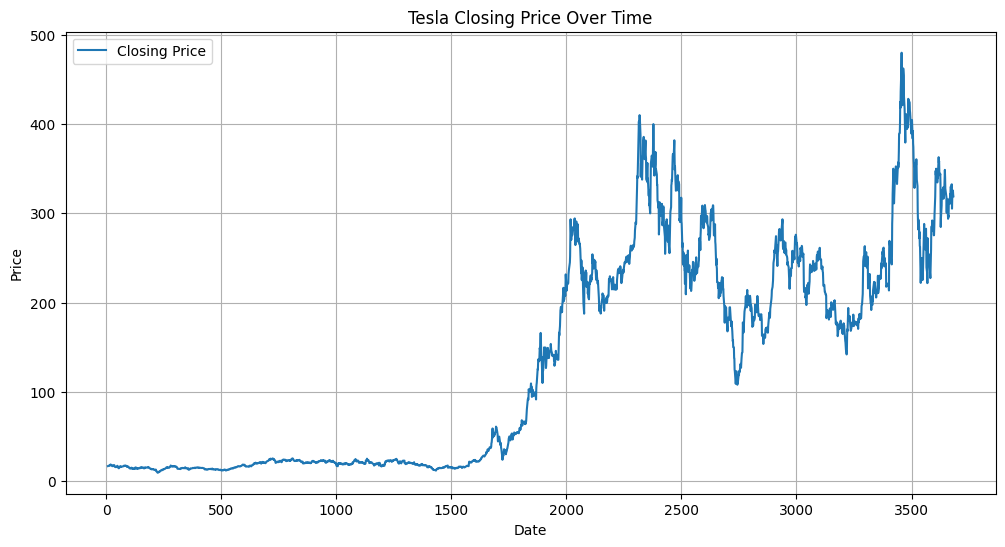

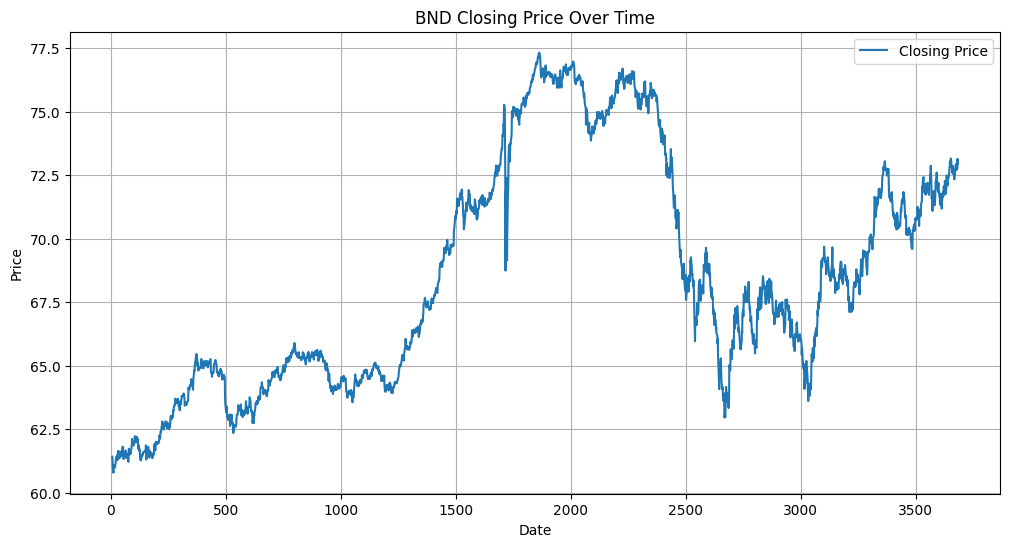

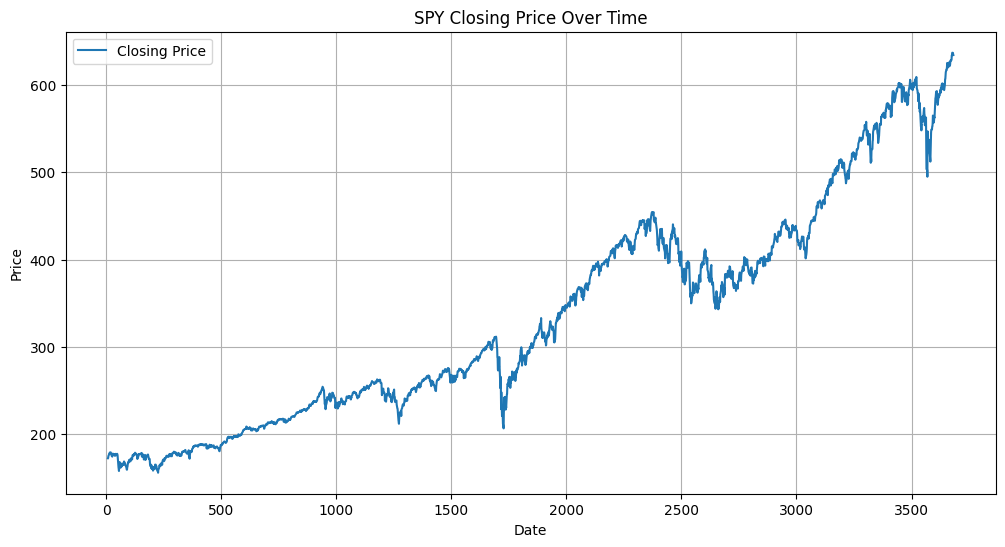

In [27]:
from visualization import plot_closing_price
plot_closing_price(df_tsla, "Tesla", "../reports/figures/daily_close_tsla.png")
plot_closing_price(df_bnd, "BND", "../reports/figures/daily_close_bnd.png")
plot_closing_price(df_spy,"SPY",  "../reports/figures/daily_close_spy.png")

### plot daily return 

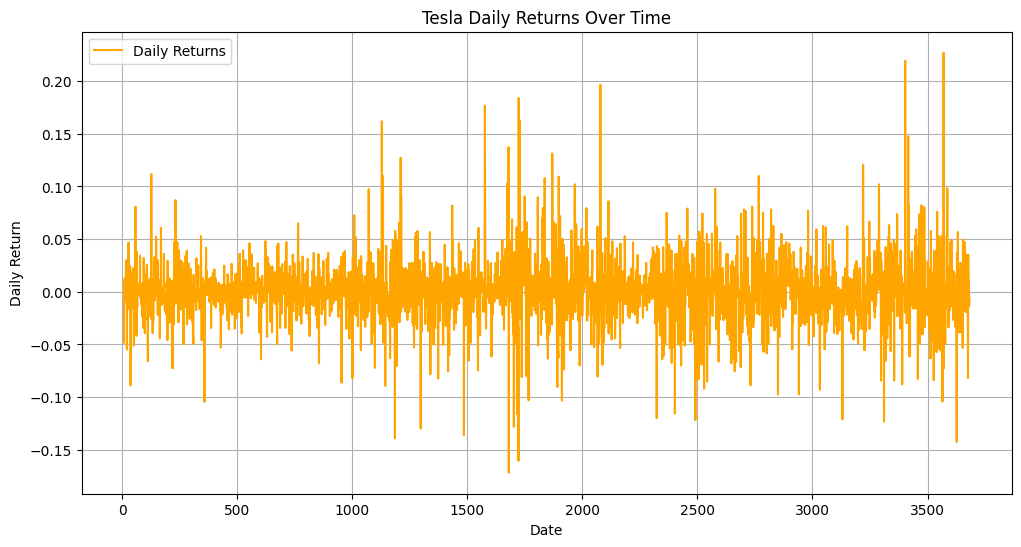

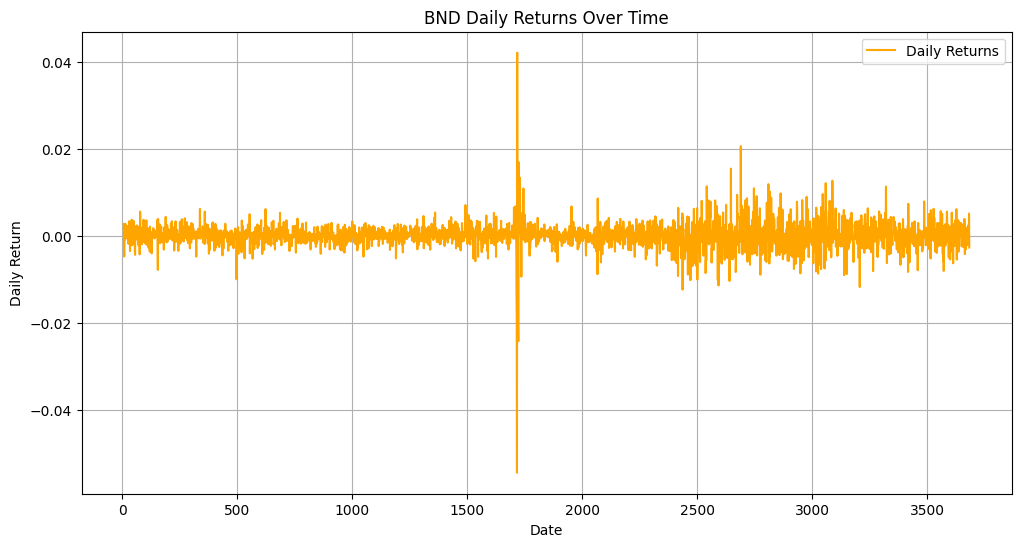

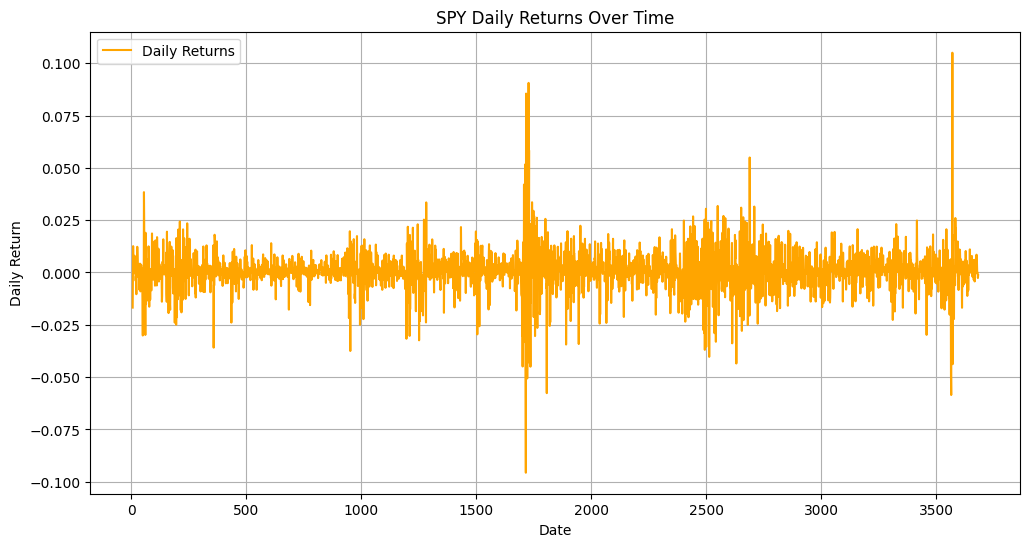

In [28]:
from visualization import plot_daily_returns
plot_daily_returns(df_tsla, "Tesla", "../reports/figures/daily_returns_tsla.png")
plot_daily_returns(df_bnd, "BND", "../reports/figures/daily_returns_bnd.png")
plot_daily_returns(df_spy, "SPY", "../reports/figures/daily_returns_spy.png")

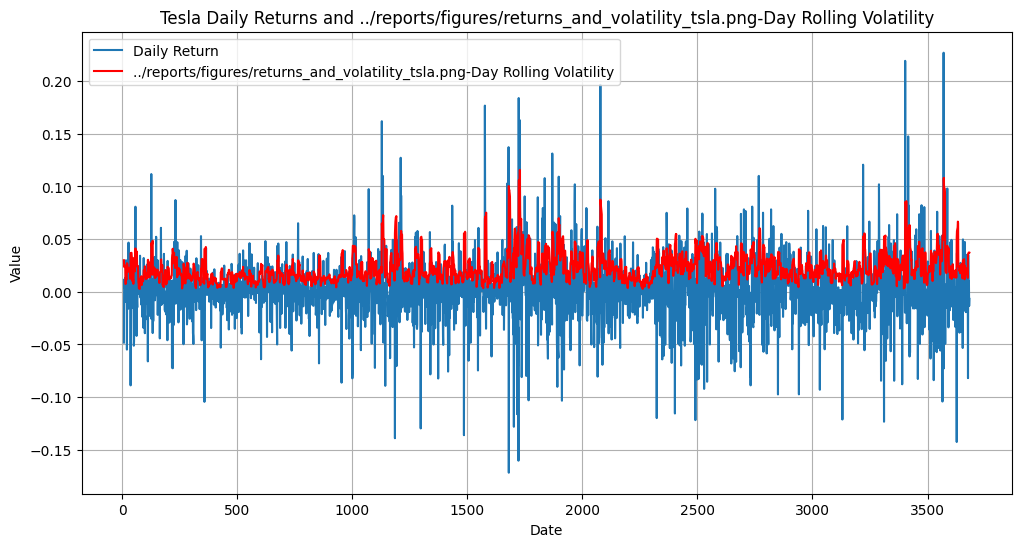

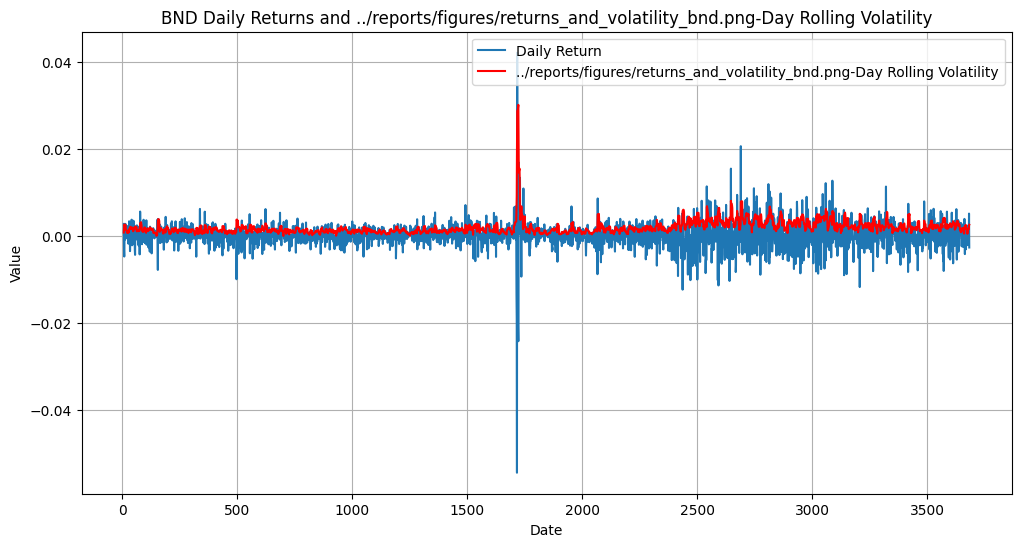

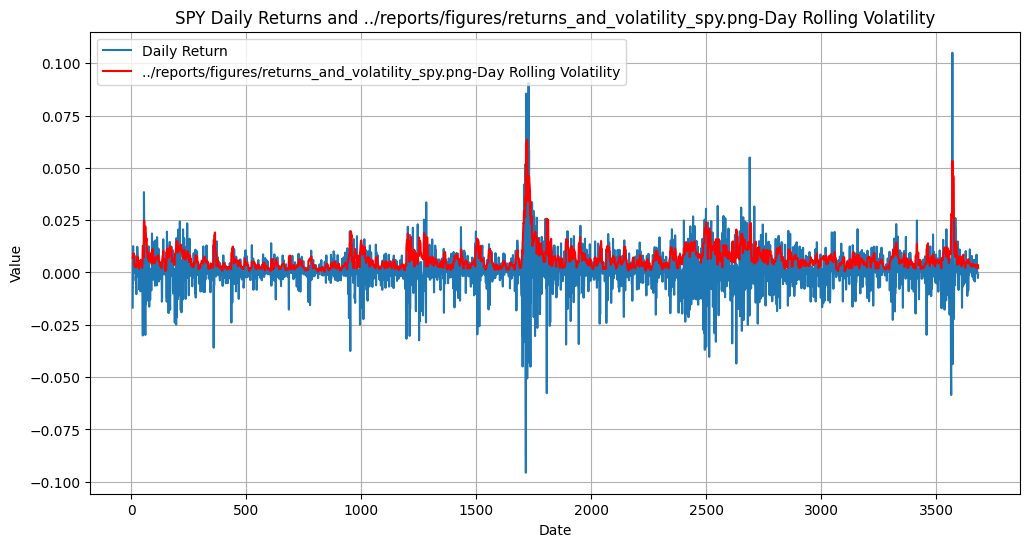

In [29]:
from visualization import plot_returns_and_volatility
plot_returns_and_volatility(df_tsla, "Tesla", "../reports/figures/returns_and_volatility_tsla.png")
plot_returns_and_volatility(df_bnd, "BND", "../reports/figures/returns_and_volatility_bnd.png")
plot_returns_and_volatility(df_spy, "SPY", "../reports/figures/returns_and_volatility_spy.png")